# GPLVM in Finance

## Imports

In [1]:
#math and plotting imports
import numpy as np
import pandas as pd
from pandas import errors
import pystan
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import arviz as az
import yfinance as yf


#CompSci imports
import os
import sys
from contextlib import contextmanager
from datetime import datetime, timedelta
from time import sleep
from hashlib import md5
from zipfile import ZipFile
import pickle

## Specs 

In [2]:
%load_ext autoreload
%autoreload 2

#Parallelization Yes/No?
run_in_parallel = False

#How Many Stocks should be chosen to infer over?
N=10



In [3]:
#ticker list 
tickers = ["MMM", "ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD", "AAP", "AES", "AMG", "AFL", "A", "APD", "AKAM", "ALK", "ALB", "ARE", "ALXN", "ALGN", "ALLE", "AGN", "ADS", "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "ABC", "AME", "AMGN", "APH", "ADI", "ANSS", "ANTM", "AON", "AOS", "APA", "AIV", "AAPL", "AMAT", "APTV", "ADM", "ARNC", "ANET", "AJG", "AIZ", "T", "ADSK", "ADP", "AZO", "AVB", "AVY", "BHGE", "BLL", "BAC", "BK", "BAX", "BBT", "BDX", "BRK-B", "BBY", "BIIB", "BLK", "HRB", "BA", "BWA", "BXP", "BSX", "BMY", "AVGO", "BR", "BF-B", "CHRW", "COG", "CDNS", "CPB", "COF", "CPRI", "CAH", "KMX", "CCL", "CAT", "CBOE", "CBRE", "CBS", "CDW", "CE", "CELG", "CNC", "CNP", "CTL", "CERN", "CF", "SCHW", "CHTR", "CVX", "CMG", "CMI", "CVS", "DHI", "DHR", "DRI", "DVA", "DE", "DAL", "XRAY", "DVN", "FANG", "DLR", "DFS", "DISCA", "DISCK", "DISH", "DG", "DLTR", "D", "DOV", "DOW", "DTE", "DUK", "DRE", "DD", "DXC", "ETFC", "EMN", "ETN", "FLT", "FLIR", "FLS", "FMC", "F", "FTNT", "FTV", "FBHS", "BEN", "FCX", "GPS", "GRMN", "IT", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL", "GPN", "GS", "GWW", "HAL", "HBI", "HOG", "HIG", "HAS", "HCA", "HCP", "HP", "HSIC", "HSY", "HES", "HPE", "HLT", "HFC", "HOLX", "HD", "HON", "HRL", "HST", "HPQ", "HUM", "HBAN", "IDXX", "INFO", "ITW", "ILMN", "IR", "INTC", "ICE", "IBM", "INCY", "IP", "IPG", "IFF", "INTU", "ISRG", "IVZ", "IPGP", "IQV", "IRM", "JKHY", "JEC", "JBHT", "SJM", "JNJ", "JCI", "JPM", "JNPR", "KSU", "K", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KSS", "KHC", "KR", "LB", "LHX", "LH", "LRCX", "LW", "LVS", "LEG", "LDOS", "LEN", "LLY", "LNC", "LIN", "LKQ", "LMT", "L", "LOW", "LYB", "MTB", "MAC", "M", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MKC", "MXIM", "MCD", "MCK", "MDT", "MRK", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MHK", "TAP", "MDLZ", "MNST", "MCO", "MS", "MOS", "MSI", "MYL", "NDAQ", "NOV", "NTAP", "NFLX", "NWL", "NEM", "NWSA", "NWS", "NEE", "NLSN", "NKE", "NI", "NBL", "JWN", "NSC", "NTRS", "NOC", "NCLH", "NRG", "NUE", "NVDA", "ORLY", "OXY", "OMC", "OKE", "ORCL", "PCAR", "PKG", "PH", "PAYX", "PYPL", "PNR", "PBCT", "PEP", "PKI", "PRGO", "PFE", "PM", "PSX", "PNW", "PXD", "PNC", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PEG", "PSA", "PHM", "PVH", "QRVO", "PWR", "QCOM", "DGX", "RL", "RJF", "RTN", "O", "REG", "REGN", "RF", "RSG", "RMD", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "CRM", "SBAC", "SLB", "STX", "SEE", "SRE", "SHW", "SPG", "SWKS", "SLG", "SNA", "SO", "LUV", "SPGI", "SWK", "SBUX", "STT", "SYK", "STI", "SIVB", "SYMC", "SYF", "SNPS", "SYY", "TMUS", "TROW", "TTWO", "TPR", "TGT", "TEL", "FTI", "TFX", "TXN", "TXT", "TMO", "TIF", "TWTR", "TJX", "TSCO", "TDG", "TRV", "TRIP", "TSN", "UDR", "ULTA", "USB", "UAA", "UA", "UNP", "UAL", "UNH", "UPS", "URI", "UTX", "UHS", "UNM", "VFC", "VLO", "VAR", "VTR", "VRSN", "VRSK", "VZ", "VRTX", "VIAB", "V", "VNO", "VMC", "WAB", "WMT", "WBA", "DIS", "WM", "WAT", "WEC", "WCG", "WFC", "WELL", "WDC", "WU", "WRK", "WY", "WHR", "WMB", "WLTW", "WYNN", "XEL", "XRX", "XLNX", "XYL", "YUM", "ZBH", "ZION", "ZTS"]

## Download Data 

In [4]:
#format: "yyyy-mm-dd"
begin = "2017-01-01"
finish = "2017-06-30"

#with suppress_stdout():
    #data_loader_price(begin, finish)
    #data_loader_returns(begin, finish)



def data_loader_returns(begin, finish):
    data_r = pd.DataFrame()
    df_r = pd.DataFrame()
    returns_r = pd.DataFrame(columns=tickers)
    loaded_r = pd.DataFrame
    df_l_r = []
    for ticker in tickers:
        loaded_r = yf.download(ticker, start=begin, end=finish).loc[:,['Adj Close']]
        df_r = loaded_r.pct_change(fill_method='ffill')
        df_l_r.append(df_r)
    df_r = pd.concat(df_l_r, axis=1)
    df_r.columns = tickers
    df_r.iloc[1:, :]
    df_r.to_csv('returns.csv')


data_loader_returns(begin, finish)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Exception in thread Thread-132:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jones/envs/env2/lib/python3.5/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/home/jones/envs/env2/lib/python3.5/site-packages/yfinance/__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "/home/jones/envs/env2/lib/python3.5/site-packages/yfinance/__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "/home/jones/envs/env2/lib/python3.5/site-packages/yfinance/__init__.py", line 354, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('DOW', "Data doesn't exist for startDate = 1483225200, endDate = 1498773600")



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [5]:
def choose_example_stocks(N):
    randints = np.random.randint(1, len(tickers), N)
    #print(randints)
    #cut file into random stock charts
    data_example = pd.read_csv('returns.csv', index_col='Date')
    data_example = data_example.iloc[:,randints]
    data_example.to_csv('data_example.csv')

choose_example_stocks(N)

number of nan's: 30
shape data: (126, 10)


,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES
Date,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.001525,0.007865,0.014221,0.030082,0.002348,0.019755,0.006378,0.000000,0.008188,-0.008763
2017-01-05,-0.003411,0.008611,0.007550,-0.008035,-0.014955,0.015553,0.016996,-0.016623,-0.000701,-0.012770
2017-01-06,0.002933,0.027215,0.000357,0.005313,0.011432,-0.000806,0.022566,0.007117,-0.013097,0.035821


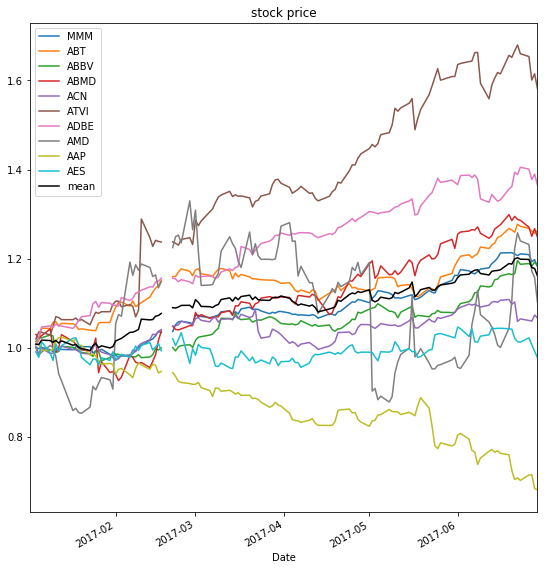

In [6]:
def plot_example_returns():
    data_use = pd.read_csv('returns.csv', index_col='Date', parse_dates=['Date']).iloc[:,:N]
    stock_list = data_use.columns
    print( "number of nan's: {}".format(data_use.isna().sum().sum()) )
    print( "shape data: {}".format(data_use.shape) )
    display(data_use.head())
    if N <= 30:
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(121)
        np.cumprod(1+data_use, axis=0).plot(ax=ax, title='stock price')
        np.cumprod(1+data_use.mean(axis=1)).plot(ax=ax, label='mean', color='black')
        ax.legend()

        #ax = fig.add_subplot(122)
        #data.plot(ax=ax, title='returns')

        plt.show()

plot_example_returns()

In [7]:
def random_weights(n):   #returns random weigths over a number of elements, normalized through 1/n
    k = np.random.rand(n)
    return k/sum(k)

def data_loader_price(begin, finish):
    data_p = pd.DataFrame()
    df_p = pd.DataFrame()
    price_p = pd.DataFrame(columns=tickers)
    df_l_p = []
    for ticker in tickers:
        loaded_p = yf.download(ticker, start=begin, end=finish).loc[:,['Adj Close']]
        df_l_p.append(df_p)
    df_p = pd.concat(df_l_p, axis=1)
    df_p.columns = tickers
    df_p.iloc[1:, :]
    df_p.to_csv('price.csv')

## Parallelisation

In [8]:
if run_in_parallel == True:
    import ipyparallel as ipp
    rc = ipp.Client()
    dview = rc.load_balanced_view()

    with rc[:].sync_imports():
        import numpy as np
        import pandas as pd
        import pystan
        from functions.helper_functions import (vb, model_dict)
    print(rc.ids)
else:
    pass

## Params

In [11]:
data = pd.read_csv("returns.csv")
Y = data.T.values
N, D = Y.shape
tries = 20
Qs = [1,2,3,4,5,6,7]

model_dict = {"linear": 0,"squ_exp": 1,"exp": 2,"matern32": 3,"matern52": 4,"squ_exp_lin" : 5,"exp_lin": 6,"squ_exp_linadd": 7,"exp_linadd": 8}
model_names = ["linear","squ_exp","exp","matern32","matern52","squ_exp_lin","exp_lin","squ_exp_linadd","exp_linadd"]


inp = [(model_name, Q) for model_name in model_names for Q in Qs]
data_dict = {'N':N,
             'D':D,
             'Qs':Qs,
             'Y':Y,
             "linear": 0,
             "squ_exp": 1,
             "exp": 2,
             "matern32": 3,
             "matern52": 4,
             "squ_exp_lin" : 5,
             "exp_lin": 6,
             "squ_exp_linadd": 7,
             "exp_linadd": 8}

# randint used to name temporary files, avoids conflicts between different runs
randint = np.random.randint(0, 1e+10)       
inp = [[*el, i+randint] for i, el in enumerate(inp)]
print('number inputs: {}'.format(len(inp)))

number inputs: 63


## Stan Model 

In [12]:
#specify stan model
gplvm = """

functions{
    matrix cov_linear(vector[] X1, vector[] X2, real sigma){
        int N = size(X1);
        int M = size(X2);
        int Q = num_elements(X1[1]);
        matrix [N,M] K;
        {
            matrix[N,Q] x1;
            matrix[M,Q] x2;
            for (n in 1:N)
        x1[n,] = X1[n]';
            for (m in 1:M)
        x2[m,] = X2[m]';
            K=x1*x2';
        }
        return square(sigma)*K;
    }

    matrix cov_matern32(vector[] X1, vector[] X2, real sigma, real l){
        int N = size(X1);
        int M = size(X2);
        matrix[N,M] K;
        real dist;
        for (n in 1:N)
            for (m in 1:M){
        dist = sqrt(squared_distance(X1[n], X2[m]) + 1e-14);
        K[n,m] = square(sigma)*(1+sqrt(3)*dist/l)*exp(-sqrt(3)*dist/l);
            }
            return K;
        }

    matrix cov_matern52(vector[] X1, vector[] X2, real sigma, real l){
        int N = size(X1);
        int M = size(X2);
        matrix[N,M] K;
        real dist;
        for (n in 1:N)
            for (m in 1:M){
        dist = sqrt(squared_distance(X1[n], X2[m]) + 1e-14);
        K[n,m] = square(sigma)*(1+sqrt(5)+(5*square(dist)/(3*square(l)))*dist/l)*exp(-sqrt(5)*dist/l);
            }
            return K;
        }

    matrix cov_exp_l2(vector[] X1, vector[] X2, real sigma, real l){
        int N = size(X1);
        int M = size(X2);
        matrix[N,M] K;
        real dist;
        for (n in 1:N)
            for (m in 1:M){
        dist = sqrt(squared_distance(X1[n], X2[m]) + 1e-14);
        K[n,m] = square(sigma)*exp(-0.5/l * dist);
            }
            return K;
        }

    matrix cov_exp(vector[] X1, vector[] X2, real sigma, real l){
        int N = size(X1);
        int M = size(X2);
        matrix[N,M] K;
        real dist;
        int Q = rows(X1[1]);
        for (n in 1:N)
            for (m in 1:M){
        dist = 0;
        for (i in 1:Q)
            dist = dist + fabs(X1[n,i] - X2[m,i]);
        K[n,m] = square(sigma)*exp(-0.5/l * dist);
            }
            return K;
        }

    matrix kernel_f(vector[] X1, vector[] X2, real sigma, real l, real a, int model_number, vector diag_stds){
        int N = size(X1);
        int M = size(X2);
        matrix[N,M] K;{
        if (model_number==0)
            K = cov_linear(X1, X2, a);
        else if (model_number==1){
            K = cov_exp_quad(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds);}
        else if (model_number==2){
            K = cov_exp(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds);}
        else if (model_number==3){
            K = cov_matern32(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds);}
        else if (model_number==4){
            K = cov_matern52(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds);}
    // from here on kernel models are in quad_form_diag (*/+) cov_linear form -> mixture models
        else if (model_number==5){
            K = cov_exp_quad(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds) * cov_linear(X1, X2, a);}
        else if (model_number==6){
            K = cov_exp(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds) * cov_linear(X1, X2, a);}
        else if (model_number==7){
            K = cov_exp_quad(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds) + cov_linear(X1, X2, a);}
        else {
            K = cov_exp(X1, X2, sigma, l);
            K = quad_form_diag(K, diag_stds) + cov_linear(X1, X2, a);}
        }
        return K;
        }
}
data {
    int<lower=1> N;
    int<lower=1> D;
    int<lower=1> Q;
    matrix[N,D] Y;
    int<lower=1,upper=8> model_number;
}

transformed data {
    vector[N] mu = rep_vector(0,N);
}

parameters {
    vector [Q] X[N];  //latent space
    real<lower=0> l;   //kernel lengthscale, hyperparameter
    vector<lower=0>[N] diag_stds;   //standard deviation for each stock
    vector<lower=0>[N] noise_std;   //observation noise
    real<lower=0> alpha;    // kernel standard deviation for a linear kernel function
}

transformed parameters{
    real R2=0;
    matrix[N,N] L;
    {
        matrix[N,N] K = kernel_f(X, X, 1., l, alpha, model_number, diag_stds);
        for (n in 1:N)
            K[n,n] = K[n,n] + pow(noise_std[n], 2) + 1e-14;
        L = cholesky_decompose(K);
        R2 = sum(1- square(noise_std) ./diagonal(K)) /N;
    }
}

model {
    for (n in 1:N)
        X[n] ~ normal(0,1);
    diag_stds ~ normal(0, .5);
    noise_std ~ normal(0, .5);
    l ~ inv_gamma(3.0, 1.0);
    alpha ~ inv_gamma(3.0, 1.0);

    for (d in 1:D)
        col(Y,d) ~ multi_normal_cholesky(mu, L);
}

generated quantities {
    real log_likelihood = 0;
    real R2_hat_N = 0;
    vector[N] R2_hat_vec_N;
    
    matrix[N,N] K = kernel_f(X, X, 1., l, alpha, model_number, diag_stds);
    
    for (d in 1:D)
        log_likelihood = log_likelihood + multi_normal_cholesky_lpdf(col(Y, d) | mu, L);

    {
        matrix[N,N] K_noise = K;
        matrix[N,D] Y_hat;
        matrix[N,D] resid;

        for (n in 1:N)
            K_noise[n,n] = K_noise[n,n] + pow(noise_std[n], 2) + 1e-14;
        Y_hat = K * mdivide_left_spd(K_noise, Y);
        resid = Y - Y_hat;
        for (n in 1:N)
            R2_hat_vec_N[n] = 1 - sum(square(row(resid,n))) / (sum(square(row(Y,n)-mean(row(Y,n)))));
        R2_hat_N = mean(R2_hat_vec_N);
        K = K_noise;   // include non-isotropic noise to output
    }
}

"""

In [13]:
#from pyStan website, pickles compiled stan model into cache.
def StanModel_cache(model_code, model_name=None, **kwargs):
    """Use just as you would `stan`"""
    code_hash = md5(model_code.encode('ascii')).hexdigest()
    if model_name is None:
        cache_fn = 'cached-model-{}.pkl'.format(code_hash)
    else:
        cache_fn = 'cached-{}-{}.pkl'.format(model_name, code_hash)
    try:
        sm = pickle.load(open(cache_fn, 'rb'))
    except:
        sm = pystan.StanModel(model_code=model_code)
        with open(cache_fn, 'wb') as f:
            pickle.dump(sm, f)
    else:
        print("Using cached StanModel")
    return sm 

#compile stan model
stan_model = StanModel_cache(model_code=gplvm)

Using cached StanModel


## Calculations 

In [14]:
def vb(data_dict, stan_model, init='random', iter=10000, tries=5, num=0):
    try: 
        fit = stan_model.vb(data=data_dict, diagnostic_file='diag_{}.csv'.format(num), sample_file='samp_{}.csv'.format(num), comment='#', sep=',')
        diag = pd.read_csv('diag_{}.csv'.format(num), names=['iter', 'time_in_seconds', 'ELBO'], comment='#', sep=',')
        samp = pd.read_csv('samp_{}.csv'.format(num), comment='#', sep=',')
        os.remove('diag_{}.csv'.format(num))
        os.remove('samp_{}.csv'.format(num)) 
    except:
        pd.errors.PaserError
        print('pandas ParserError, currently trying again')
        diagnostic, sample = vb(data_dict, stan_model, init=init, iter=iter, tries=tries, num=num)
    for _ in range (tries-1):
        diag_, samp_ = vb(data_dict, stan_model, init, iter=iter, tries=1, num=num)
        if diag.loc[:,'ELBO'].values[-1] < diag_.loc[:,'ELBO'].values[-1]:
            diag = diag_
            samp = samp_
        del(diag_, samp_)
    return diag, samp

In [15]:
#train the model

def calc(model_name, Q, num):
    n_error, should_break, n_error_max = 0, False, 5
    while n_error<n_error_max:
        try:
            diagnostic, sample = vb(data_dict, stan_model, tries=tries, num=num)
            n_error = n_error_max
        except RuntimeError:
            n_error += 1
            if n_error == n_error_max: should_break = True
            print('RuntimeError')
    if should_break:
        print('RuntimeError occurred too often.')
        return None
    ELBO = diagnostic.loc[:, 'ELBO'].values[-1]
    r2 = sample.filter(regex='^R2_hat_N$').mean(axis=0).values.squeeze()
    lengthsc = sample.filter(regex='^kernel_lengthscale$').mean(axis=0).values.squeeze()
    lengthsc_median = sample.filter(regex='^kernel_lengthscale$').median(axis=0).values.squeeze()
    diag_std_dev = sample.filter(regex='^diag_std').mean(axis=0).values.squeeze()
    noise_std_dev = sample.filter(regex='^noise_std').mean(axis=0).values.squeeze()
    signal_to_noise = sample.filter(regex='^R2$').mean(axis=0).values.squeeze()
    frequency = sample.filter(regex='^frequency$').mean(axis=0).values.squeeze()
    alpha = sample.filter(regex='^alpha$').mean(axis=0).values.squeeze()
    cov = sample.filter(regex='^K').mean(axis=0).values.reshape(N,-1)
    X = sample.filter(regex='^X.\d{1,4}.\d{1,3}$').mean(axis=0).values.reshape(Q, N).T
    col_names = ['model_name', 'Q', 'ELBO', 'R2', 'lengthscale', 'alpha' ]
    df = pd.DataFrame({num: (model_name, Q, elbo, r2, lengthscale, alpha)}, index=col_names).T
    
    return df#, cov, X, ELBO, model_name

In [16]:
data = np.ndarray.tolist(np.array(pd.read_csv("returns.csv")))
#print(data)

In [18]:
%%time
def DoIt(run_in_parallel):
    if run_in_parallel:
        async_res = []
        ids = []
        rc[:].push(dict(N=N, D=D, Y=Y, stan_model=stan_model, tries=tries), block=True)
        for param in inp:
            re = dview.apply_async(calc, *param)
            async_res.append(re)
            ids.extend(re.msg_ids)
        sleep(10)
        while True:
            print(str(len(rc.result_status(ids)['pending'])) +"/"
                  +str(len(rc.result_status(ids)['pending'])
                       +len(rc.result_status(ids)['completed']))
                  +" still running. on " + str(len(rc.ids)) + " cores", end="\r")
            sleep(10)
            if len(rc.result_status(ids)['pending']) == 0: break
        results = [r.get() for r in async_res]
    else:
        results = []
        print('starting calculations ...', flush=True)
        for i, inp_ in enumerate(inp):
            results.append( calc(*inp_) )
            print('{}% done'.format( int(100*(i+1)/len(inp)) ), end='\r', flush=True)


DoIt(run_in_parallel=False)

starting calculations ...


AttributeError: module 'pandas.errors' has no attribute 'PaserError'